C:\Users\pedro\AppData\Local\Temp\ipykernel_15152\2709262764.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datas = pd.date_range(start='2016-01-01', periods=n_pontos, freq='M')


<Figure size 1200x800 with 0 Axes>

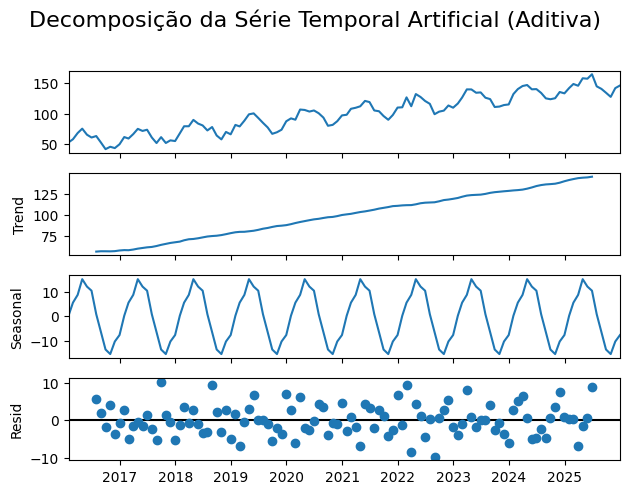

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# --- 1. Geração da Série Temporal Artificial ---

# Parâmetros
n_pontos = 120  # Total de pontos (10 anos de dados mensais, por exemplo)
periodo_sazonal = 12 # Sazonalidade anual (mensal)

# Criar o índice de tempo (datas mensais)
datas = pd.date_range(start='2016-01-01', periods=n_pontos, freq='M')

# Componente 1: Tendência (crescimento linear)
# Valores de 1 a 10 para 120 pontos, simulando um crescimento
tendencia = np.linspace(50, 150, n_pontos)

# Componente 2: Sazonalidade (onda senoidal anual)
# Gera uma onda senoidal com um ciclo de 12 meses
# A amplitude (força) da sazonalidade é definida por * 15
sazonalidade = 15 * np.sin(2 * np.pi * np.arange(n_pontos) / periodo_sazonal)

# Componente 3: Ruído (variações aleatórias)
# Ruído branco com média zero
np.random.seed(42) # Para reprodutibilidade
ruido = np.random.normal(0, 5, n_pontos) 

# Série Temporal Observada: Modelo Aditivo
# Série = Tendência + Sazonalidade + Ruído
serie_temporal_artificial = tendencia + sazonalidade + ruido

# Criar um objeto Pandas Series com o índice de tempo
ts_data = pd.Series(serie_temporal_artificial, index=datas)

# --- 2. Decomposição da Série Temporal com Statsmodels ---

# Aplicar a decomposição sazonal
# model='additive': Assume que os componentes se somam (Y = T + S + R)
# period: Especifica o período da sazonalidade (12 meses)
decomposition = seasonal_decompose(
    ts_data, 
    model='additive', 
    period=periodo_sazonal
)

# --- 3. Visualização dos Resultados ---

# Plotar a série original e seus componentes decompostos
plt.figure(figsize=(12, 8))

# O método .plot() do objeto de decomposição gera os 4 gráficos automaticamente
decomposition.plot()
plt.suptitle('Decomposição da Série Temporal Artificial (Aditiva)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

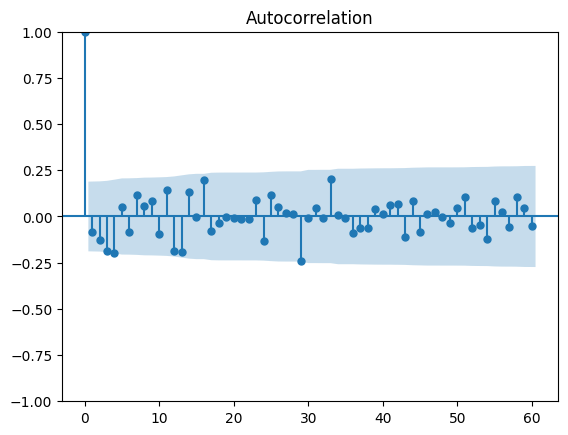

In [4]:
residuals = decomposition.resid.values
residuals = residuals[~np.isnan(residuals)]

plot_acf(residuals, lags = 60)
plt.show()